In [1]:
%load_ext autoreload
%autoreload 2
import math
import random
import ziaplot as zp
import numpy as np
import re

import schemdraw
from schemdraw import flow

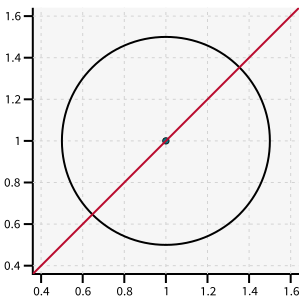

In [35]:
with zp.Graph().equal_aspect():#.xrange(-4, 4).yrange(-4, 4):
    zp.Point(1, 1)
    zp.Circle(1, 1, .5)
    zp.Line(point=(1, 1), slope=1)

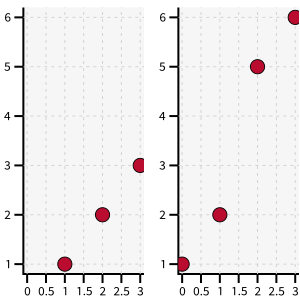

In [30]:
with zp.LayoutH():
    with zp.Graph() as g1:
        zp.Scatter(x, y)
    with zp.Graph() as g2:
        zp.Scatter(x, y2)
    g1.match_y(g2)

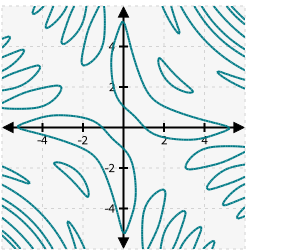

In [22]:

with zp.GraphQuad().equal_aspect():
    zp.Implicit(lambda x, y: math.cos(x+y)-math.cos(x*y) + .5,
                xlim=(-6, 6), ylim=(-6, 6))


In [23]:
zp.css('Canvas{width:300;height:300;}')

In [8]:
zp.theme('pastel')

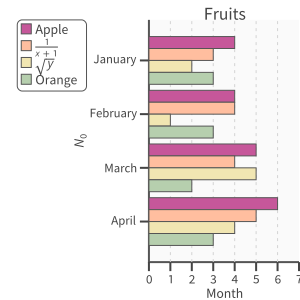

In [9]:
(zp.BarChartGroupedHoriz.fromdict(
    {'Apple': (4, 4, 5, 6),
     r'$\frac{1}{x+1}$': (3, 4, 4, 5),
     r'$\sqrt{y}$': (2, 1, 5, 4),
     'Orange': (3, 3, 2, 3)},
    groups=['January', 'February', 'March', 'April'])
 .title('Fruits').axesnames('Month', '$N_0$',).legend('left'))

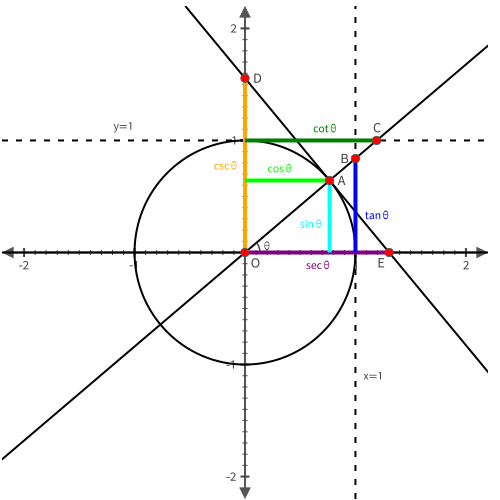

In [11]:
css = '''
Line {
    color: black;
}
Point {
    color: red;
    radius: 5;
}
Point.Text {
    font_size:14;
}
''' + zp.CSS_NOBACKGROUND + zp.CSS_NOGRID

with (zp.GraphQuad().css(css)
          .size(500, 500)
          .xrange(-2, 2).xticks(zp.ticker[-2:2:1], minor=zp.ticker[-2:2:.1])
          .yrange(-2, 2).yticks(zp.ticker[-2:2:1], minor=zp.ticker[-2:2:.1])):
    theta = 40
    circ = zp.Circle(0, 0, 1)
    xaxis = zp.HLine(0)
    x1 = zp.VLine(1).stroke('--').label('x=1', .25, 'E')
    y1 = zp.HLine(1).stroke('--').label('y=1', .25, 'N')
    hyp = zp.Line((0,0), math.tan(math.radians(theta)))
    tan = zp.Tangent.to_circle(circ, theta)
    E = zp.x_intercept(tan)
    D = zp.y_intercept(tan)
    C = zp.line_intersection(y1, hyp)
    B = zp.line_intersection(x1, hyp)
    A = zp.line_intersection(hyp, tan)
    sec = zp.Segment((0, 0), E).strokewidth(4).color('purple').label(r'$\sec\theta$', .5, 'S', color='purple')
    csc = zp.Segment((0, 0), D).strokewidth(4).color('orange').label(r'$\csc\theta$', .5, 'W', color='orange')
    cot = zp.Segment.horizontal(C).strokewidth(4).color('green').label(r'$\cot\theta$', .4, 'N', color='green')
    tan = zp.Segment.vertical(B).strokewidth(4).color('blue').label(r'$\tan\theta$', .6, 'E', color='blue')
    cos = zp.Segment.horizontal(A).strokewidth(4).color('lime').label(r'$\cos\theta$', .6, 'N', color='lime')
    sin = zp.Segment.vertical(A).strokewidth(4).color('cyan').label(r'$\sin\theta$', .6, 'W', color='cyan')
    zp.Angle.to_zero(hyp, quad=4).label(r'$\theta$')
    # Draw points last so they stay on top
    zp.Point(0, 0).label('O', 'SE')
    zp.Point(*A).label('A', 'E')
    zp.Point(*B).label('B', 'W')
    zp.Point(*C).label('C', 'N')
    zp.Point(*D).label('D', 'E')
    zp.Point(*E).label('E', 'SW')


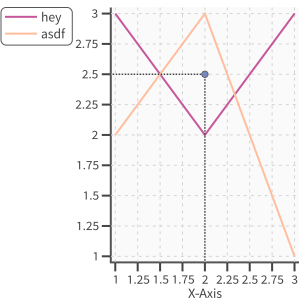

In [12]:
p = zp.Graph().axesnames(x='X-Axis').legend('left')
p += zp.PolyLine([1,2,3],[3,2,3]).name('hey')
p += zp.PolyLine([1,2,3],[2,3,1]).name('asdf')
p += zp.Point(2, 2.5).guidex().guidey()
p

In [19]:
zp.theme('taffy')
zp.css('')


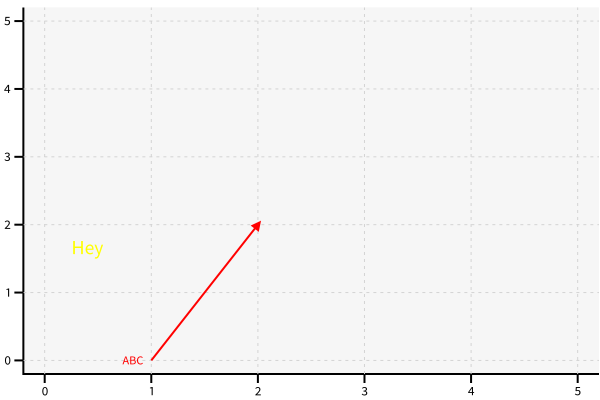

In [20]:
css = '''
Axes {
color: #EEEEFE;
}
'''

with zp.Graph().xrange(0, 5).yrange(0, 5).css(css):#.equal_aspect():
   # l1 = zp.Line((0,0),1).name('Line1')
    #l2 = zp.Line((0,0),0).name('Line2')
    zp.Text(.25, 1.5, 'Hey').style('font_size: 20; color: yellow;')
    zp.Arrow((2,2), (1,0)).label('ABC', 'W').style('color: red; edge_color: none;')
    #zp.LineFill([1,2,3,4], [2,3,1,4], [1,0,.5,0]).style_set('edge_color: blue;')
    #p = zp.ErrorBar([1,2,3], [3,2,4], [.2, .2, .2], [.4, .4, .4]).style_set('color: orange; shape: round;')
    #p2 = zp.Scatter([1,2,3], [4,4,2]).name('Blah').style_set('color: blue;')
    #p3 = zp.PolyLine([.5,2,3], [4,3,2]).marker('square')#.style_set('color: blue;')

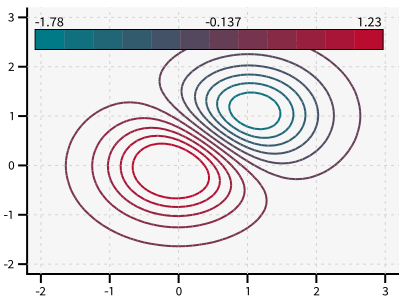

In [21]:
delta = .1
x = zp.util.zrange(-2., 3., delta)
y = zp.util.zrange(-2., 3., delta)
z = [[2 * (math.exp(-xx**2 - yy**2) - math.exp(-(xx-1)**2 - (yy-1)**2)) for xx in x] for yy in y]

with zp.Graph().size(400,300):
    p = zp.Contour(x, y, z, levels=12, colorbar='top')#.style_set('colorcycle: #FF0000, #00FFFF;')